In [3]:
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic
from statsmodels.stats.proportion import samplesize_confint_proportion
from statsmodels.stats.proportion import proportion_confint
import pprint as pp
import pandas as pd
from __future__ import division
import scipy.stats as sts
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_water = pd.read_csv("water.txt", sep="\t")
data_water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
data_water.shape[0]

61

In [4]:
confidence_interval_2 = _tconfint_generic(data_water["mortality"].mean(), data_water["mortality"].std(ddof=1)/(len(data_water)**0.5), data_water.shape[0]-1,0.05, 'two-sided')

In [5]:
confidence_interval_2

(1476.0833413552848, 1572.2117406119285)

In [6]:
south =  data_water[data_water["location"]=="South"]
confidence_interval_3 = _tconfint_generic(south["mortality"].mean(), south["mortality"].std(ddof=1)/(south.shape[0]**0.5), south.shape[0]-1,0.05, 'two-sided')

In [7]:
confidence_interval_3

(1320.1517462936238, 1433.463638321761)

In [8]:
north =  data_water[data_water["location"]=="North"]
confidence_interval_4 = _tconfint_generic(north["mortality"].mean(), north["mortality"].std()/len(north)**0.5, north.shape[0]-1,0.05, 'two-sided')

In [9]:
confidence_interval_4

(1586.5605251961385, 1680.6394748038613)

In [10]:
water_north = _tconfint_generic(north["hardness"].mean(), north["hardness"].std(ddof=1)/(north.shape[0]**0.5), north.shape[0]-1,0.05, 'two-sided')
water_north

(21.42248728572426, 39.37751271427574)

In [11]:
water_south = _tconfint_generic(south["hardness"].mean(), south["hardness"].std(ddof=1)/(south.shape[0]**0.5), south.size-1,0.05, 'two-sided')
water_south

(54.070939682916446, 85.4675218555451)

In [12]:
south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [13]:
proportion_confint(1, 50, method="normal")
# from colab
# (-0.018805307081790987, 0.05880530708179099)

(0.0, 0.05880530708179099)

In [14]:
proportion_confint(1, 50, method="wilson")

(0.003539259271646236, 0.10495443589637815)

In [15]:

# int(np.ceil(samplesize_confint_proportion(0.02, 0.05)))

In [16]:
1/(385 ** 0.5) * 1.96

0.09989084952177461

In [17]:
np.ceil(samplesize_confint_proportion(0.02,0.01,alpha=0.05))

753.0

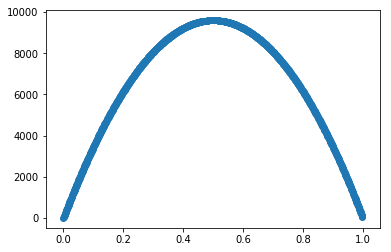

In [18]:
p = np.arange(0,1, 0.001)
sample_cp = [np.ceil(samplesize_confint_proportion(i, 0.01,alpha=0.05)) for i in p]
pyplot.scatter(p, sample_cp)

In [19]:
# lest find out maximum of this fucntion
max(sample_cp)

9604.0

In [20]:
# Quora of Conf intervals

In [21]:
# first task
abs(round(sts.norm.ppf(0.0015),4))
# ?sts.norm.ppf

2.9677

In [4]:
placebo = 11034
aspirin = 11037
placebo_damage = 189
aspirin_damage = 104

aspirin_gen = np.array([1] * aspirin_damage + [0] * (aspirin-aspirin_damage))
placebo_gen = np.array([1] *  placebo_damage + [0] * (placebo-placebo_damage))



p1 = placebo_damage / placebo
p2  = aspirin_damage / aspirin
print  p1-p2
# task 5

0.007706023976


In [87]:
len(aspirin_gen)

11141

In [35]:
proportion_confint(sum(p2), len(aspirin_gen), method="wilson")

(2.0645311612078714e-09, 0.0003463738382380388)

In [24]:
# np.random.seed(0)

# left, right = proportion_confint(aspirin_damage, aspirin, 0.05, method="wilson")
# print round(left,4), round(right,4)

In [51]:
test_aspi = aspirin_damage/(aspirin-aspirin_damage)
test_plac = placebo_damage/(placebo-placebo_damage)
test_aspi/(test_plac-test_aspi)
# chek this first
# task 7
print round(test_plac/test_aspi,4)
print test_aspi

1.8321
0.00951248513674


In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = sts.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)


def proportions_confint_diff_ind(sample1, sample2, alpha=0.05):    
    z = sts.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [101]:

get_int = proportions_confint_diff_ind(placebo_gen, aspirin_gen)
print get_int
map(lambda x: round(x,4), get_int)
#check this 6 task


(0.004687750675049439, 0.010724297276960124)


[0.0047, 0.0107]

In [7]:
def odd(x):
#     p = sum(x) / len(x)
    return sum(x) / (len(x) - sum(x))

np.random.seed(0)
placebo_sample1 = np.array(map(odd, get_bootstrap_samples(placebo_gen, 1000)))
aspirin_sample1 = np.array(map(odd, get_bootstrap_samples(aspirin_gen, 1000)))





print "95% confidence interval for the ILEC median repair time:",  stat_intervals(aspirin_sample1, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(placebo_sample1, 0.05)

temp = stat_intervals(placebo_sample1/aspirin_sample1, 0.05)

temp

95% confidence interval for the ILEC median repair time: [0.00776114 0.01126993]
95% confidence interval for the CLEC median repair time: [0.01480732 0.0198748 ]


array([1.46286276, 2.35093673])

In [8]:
round(temp[0],4)

1.4629

In [59]:
# get_int8 = proportions_confint_diff_ind( placebo_sample1, aspirin_sample1, 0.05)
# get_int8
# # chek this, its new 8 task